In [1]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
inp0 = pd.read_csv("Mall_Customers.csv")

In [4]:
inp0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
inp0.shape

(200, 5)

In [5]:
inp0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
inp0.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
inp0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
inp0.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

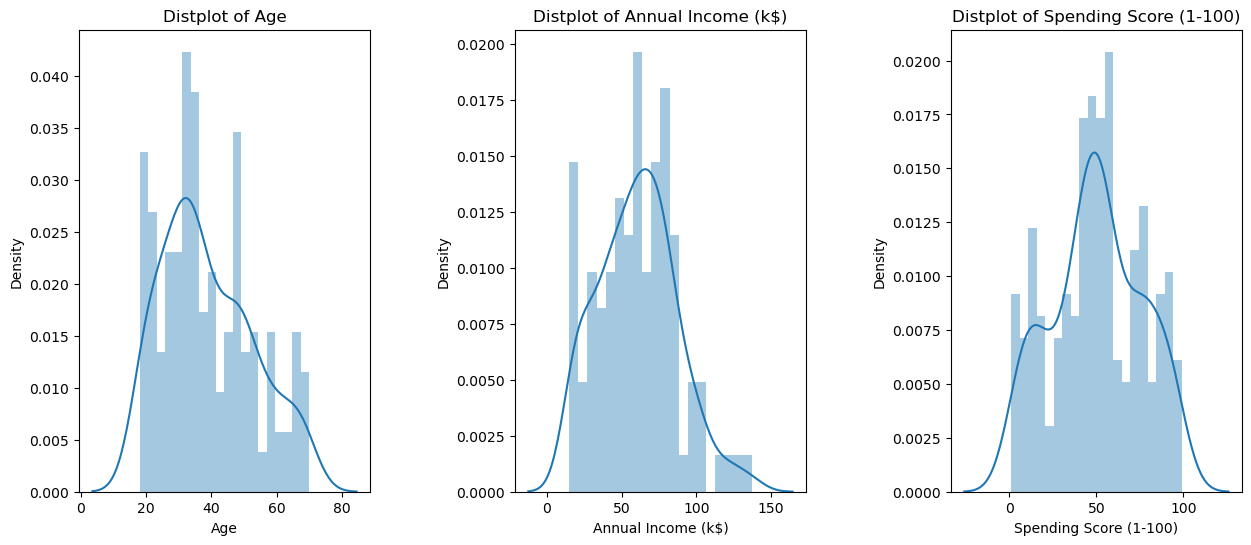

In [29]:
plt.figure(1, figsize= (15,6))
n= 0 
for x in ["Age", "Annual Income (k$)" ,"Spending Score (1-100)"]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(inp0[x] , bins = 20)
    plt.title("Distplot of {}".format(x))
plt.show()

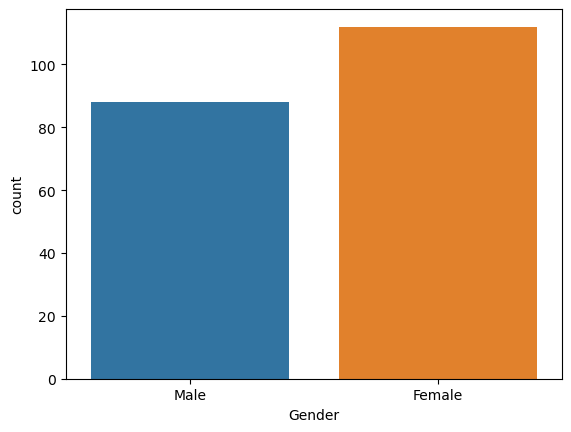

In [24]:
sns.countplot(data=inp0, x="Gender")
plt.show()

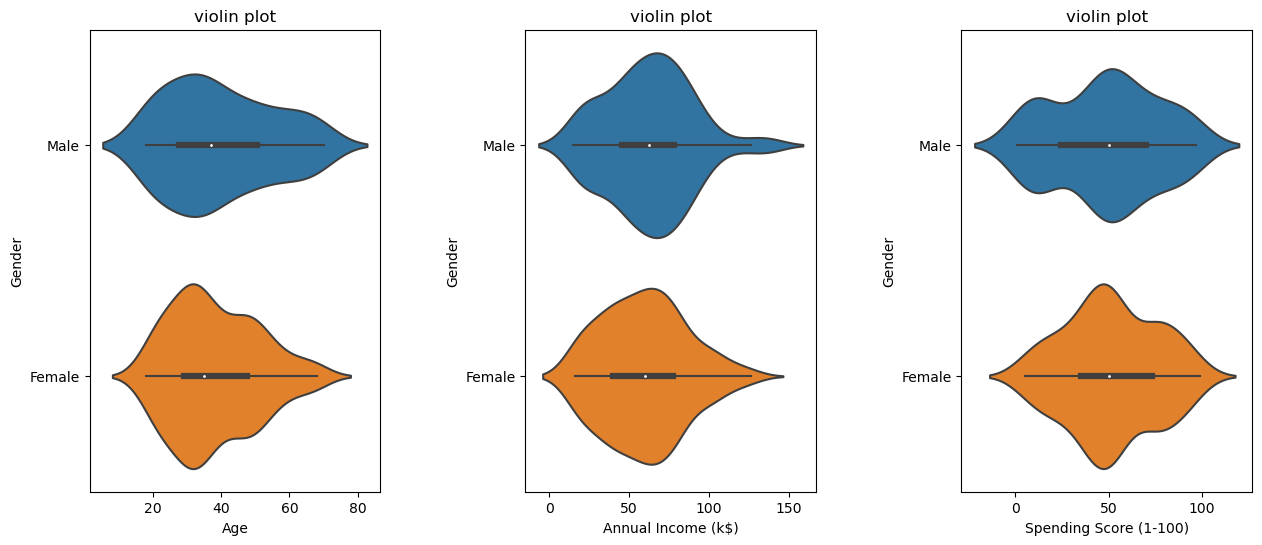

In [35]:
plt.figure(1, figsize= (15,6))
n= 0 
for x in ["Age", "Annual Income (k$)" ,"Spending Score (1-100)"]:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot(data=inp0, x=x ,y="Gender")
    plt.title("violin plot")
plt.show()

In [36]:
inp0.drop(["CustomerID"], axis="columns", inplace=True)

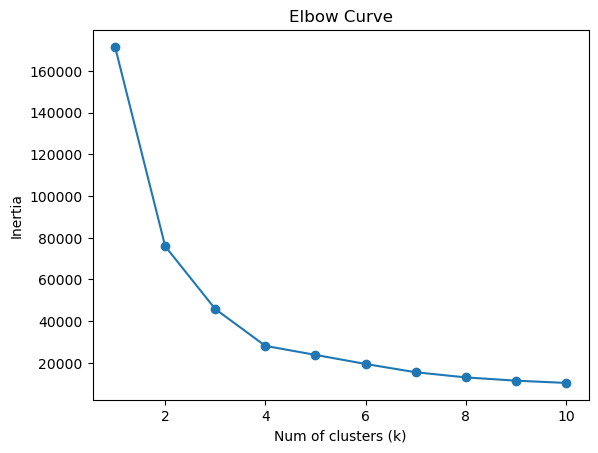

In [49]:
X = inp0[["Age" ,"Spending Score (1-100)"]].iloc[:,:].values


max_k =  10
inertia =[]
K_values =  range(1, max_k+1)

for K in K_values:
    Kmeans = KMeans(n_clusters=K)
    Kmeans.fit(X)
    inertia.append(Kmeans.inertia_)
    
plt.plot(K_values,inertia,marker ='o')
plt.xlabel("Num of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 4 ,max_iter=1000, tol=.00001,  random_state= 64  , algorithm='elkan')
kmeans.fit(X)

KMeans(algorithm='elkan', max_iter=1000, n_clusters=4, random_state=64,
       tol=1e-05)

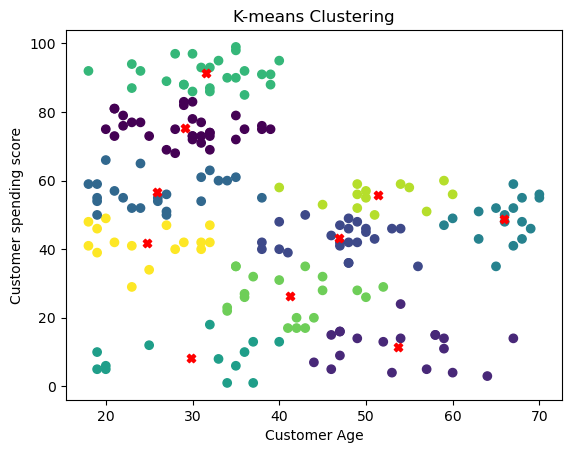

In [54]:
plt.scatter(X[:,0],X[:,1], c= Kmeans.labels_, cmap="viridis")
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1] ,marker='X',color ="red")
plt.xlabel('Customer Age')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

In [73]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

distances = [np.linalg.norm(X[i] - centroids[labels[i]]) for i in range(len(X))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

WCSS: 258856.8086071739


In [75]:
labels = kmeans.labels_
silhouette_coefficient = silhouette_score(X, labels)

print("Silhouette Coefficient:", silhouette_coefficient)

Silhouette Coefficient: 0.1632888738101461


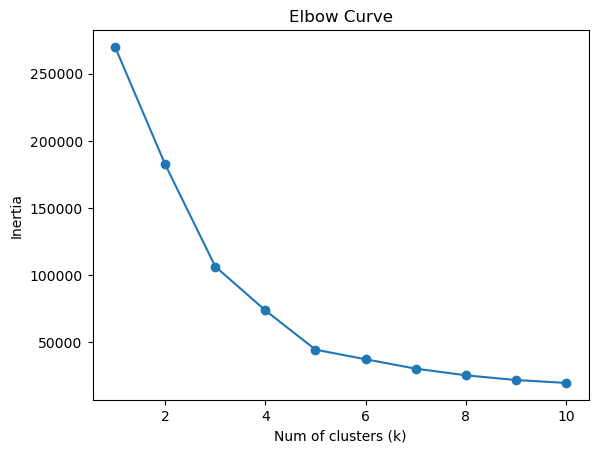

In [56]:
X1 = inp0[["Annual Income (k$)" ,"Spending Score (1-100)"]].iloc[:,:].values


max_k =  10
inertia =[]
K_values =  range(1, max_k+1)

for K in K_values:
    Kmeans = KMeans(n_clusters=K)
    Kmeans.fit(X1)
    inertia.append(Kmeans.inertia_)
    
plt.plot(K_values,inertia,marker ='o')
plt.xlabel("Num of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve")
plt.show()

In [70]:
Kmeans1 = KMeans(n_clusters = 5 ,max_iter=1000, tol=.00001,  random_state= 64  , algorithm='full')
Kmeans1.fit(X1)

KMeans(algorithm='full', max_iter=1000, n_clusters=5, random_state=64,
       tol=1e-05)

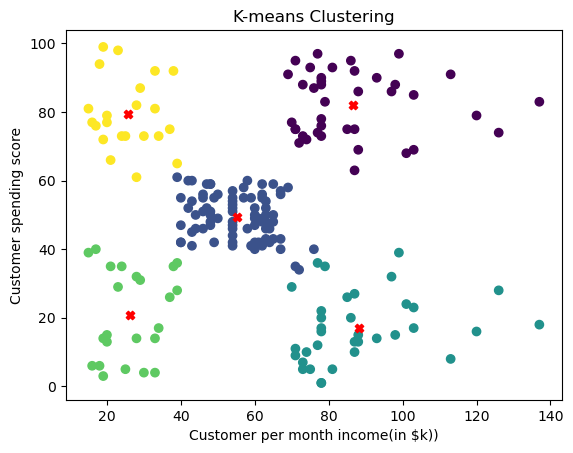

In [71]:
plt.scatter(X1[:,0],X1[:,1], c=Kmeans1.labels_, cmap="viridis") 
plt.scatter(Kmeans1.cluster_centers_[:,0],Kmeans1.cluster_centers_[:,1] ,marker='X',color ="red")
plt.xlabel('Customer per month income(in $k))')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

In [76]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

distances = [np.linalg.norm(X1[i] - centroids[labels[i]]) for i in range(len(X1))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

WCSS: 44448.45544793371


In [77]:
labels = kmeans.labels_
silhouette_coefficient = silhouette_score(X1, labels)

print("Silhouette Coefficient:", silhouette_coefficient)

Silhouette Coefficient: 0.553931997444648
